# Analyzing simplyhired.com scraped data
## Introduction

I [collected data from simplyhired.com](https://github.com/Derrick-Mulwa/Web-Scraping-SimplyHired "The repository where I scraped the data") that contains details about jobs being advertised for Data Analysis/Business Analysis positions in the US. The data is stored in the Collected data.csv file in this repository. I will use the data to get insights of the job postings.

### These are the ten potential hypotheses I will investigate with this dataset:
* Companies with higher ratings tend to offer higher salaries than those with lower ratings.
* Jobs in larger cities tend to have higher salaries than those in smaller cities.
* Full-time jobs tend to have higher salaries than part-time jobs.
* The most common job qualifications for high-paying jobs are related to specific technical skills.
* The most common job benefits for high-paying jobs include healthcare and retirement plans.
* Salaries in certain states tend to be higher than in others.
* Jobs that pay annually tend to pay more than jobs that pay monthly or hourly
* Senior analyst's roles tend to have higher salaries than junior analyst roles.
* Senior analyst jobs tend to have more job benefits than junior analyst jobs.
* Senior analyst roles require more qualifications than junior analyst jobs.
* Lower rated companies are more likely to hire junior/Entry level analysts than hiher rated analysts.
* There is a positive correlation between the number of job benefits offered and the company rating.









In [1]:
# Import modules to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline

## Understanding the data

In [2]:
# read in the data
df = pd.read_csv("Collected data.csv", index_col = 0)
df.head(5)

,job_title,company_name,rating,company_location(city),company_location_state,salary_type,payment_cycle,Salary Range From,Salary range To,currency,job_type,job_benefits,qualifications,job_description
0,"Senior Business Analyst, Contract Data",Stericycle,3.1,New Jersey,New Jersey,NaN,NaN,NaN,NaN,NaN,Full-time | Contract,"Prescription drug insurance, Dental insurance,...",Bachelor's degree,"About Us:\nAt Stericycle, we deliver solutions..."
1,Digital Commerce Business Analyst,Sealed Air,3.5,Charlotte,NC,Estimated,Annually,"65,000","85,000",$,NaN,NaN,"Change management, Project management, Analysi...",Sealed Air designs and delivers packaging solu...
2,"Analyst, Sales Force Deploy-SR",Quest Diagnostics,3.6,Collegeville,PA,Estimated,Annually,"91,000","120,000",$,Full-time,NaN,"Microsoft Access, Laboratory experience, Micro...",Overview: Provide analysis and insight into sa...
3,Senior Business Analyst,eSales Technologies,NaN,West Babylon,NY,Estimated,Annually,"89,000","120,000",$,NaN,NaN,"Analysis skills, Microsoft Excel, Business ana...",We are hiring a Business Analyst to join our p...
4,Business Analyst,Saama Technologies Inc,3.5,Bridgewater,NJ,Estimated,Annually,"110,000","140,000",$,NaN,NaN,"Analysis skills, Communication skills, Informa...",Does solving complex business problems and rea...


## The dataframe has the following columns:
* __job_title__ : Contains the name of position being advertised	
* __company_name__ : Contains the name of the company
* __rating__ : Contains the rating of the company (0-5 star company)
* __company_location(city)__: Contains the city in which the company is located
* __company_location_state__ : Contains the state where the company/organisation is located
* __salary_type__ : Defines whether the salary stated is Estimated by simplyhired.com or Explicitly defined by the employer
* __payment_cycle__	: Defines the payment duration (monthly/ hourly/ annually)
* __Salary Range From__	: Low bound of the salary to be paid
* __Salary range To__	: High bound of the salary to be paid
* __currency__	: Currency of the payments ie (dollars/Pound/Euro)
* __job_type__	: Defines whether the job is full time or part time
* __job_benefits__: Contains a list of job benefits offered for that position by the company
* __qualifications__: Contains a list of job qualifications/skills required for that position by the company
* __job_description__: Contains a thorough description of the job.

In [3]:
df.shape

(5849, 14)

The dataframe has 5849 records and 14 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 5884
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_title               5849 non-null   object 
 1   company_name            5844 non-null   object 
 2   rating                  4488 non-null   float64
 3   company_location(city)  5849 non-null   object 
 4   company_location_state  5849 non-null   object 
 5   salary_type             5012 non-null   object 
 6   payment_cycle           5012 non-null   object 
 7   Salary Range From       5012 non-null   object 
 8   Salary range To         5012 non-null   object 
 9   currency                5012 non-null   object 
 10  job_type                4443 non-null   object 
 11  job_benefits            3008 non-null   object 
 12  qualifications          5801 non-null   object 
 13  job_description         5849 non-null   object 
dtypes: float64(1), object(13)
memory usage: 

## Data Cleaning

"Salary Range From" and "Salary range To" columns should be converted to float data type for manipulation.

In [5]:
df["Salary Range From"]

0           NaN
1        65,000
2        91,000
3        89,000
4       110,000
         ...   
5877        NaN
5878     63,100
5879        NaN
5880     70,000
5884         35
Name: Salary Range From, Length: 5849, dtype: object

In [6]:
# remove the comma in the values and convert to float

df["Salary Range From"].replace(",", "", regex=True, inplace = True)
df["Salary range To"].replace(",", "", regex=True, inplace = True)


#Convert to float
df = df.astype({
    "Salary Range From": float,
    "Salary range To":float
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 5884
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_title               5849 non-null   object 
 1   company_name            5844 non-null   object 
 2   rating                  4488 non-null   float64
 3   company_location(city)  5849 non-null   object 
 4   company_location_state  5849 non-null   object 
 5   salary_type             5012 non-null   object 
 6   payment_cycle           5012 non-null   object 
 7   Salary Range From       5012 non-null   float64
 8   Salary range To         5012 non-null   float64
 9   currency                5012 non-null   object 
 10  job_type                4443 non-null   object 
 11  job_benefits            3008 non-null   object 
 12  qualifications          5801 non-null   object 
 13  job_description         5849 non-null   object 
dtypes: float64(3), object(11)
memory usage: 

### Remove duplicates

In [7]:
df[df.duplicated(subset=["job_title","company_name", "company_location(city)"], keep=False)].sort_values(by="job_title").count()

job_title                 0
company_name              0
rating                    0
company_location(city)    0
company_location_state    0
salary_type               0
payment_cycle             0
Salary Range From         0
Salary range To           0
currency                  0
job_type                  0
job_benefits              0
qualifications            0
job_description           0
dtype: int64

The dataframe has no duplicated records 

In [8]:
df.head()

,job_title,company_name,rating,company_location(city),company_location_state,salary_type,payment_cycle,Salary Range From,Salary range To,currency,job_type,job_benefits,qualifications,job_description
0,"Senior Business Analyst, Contract Data",Stericycle,3.1,New Jersey,New Jersey,NaN,NaN,NaN,NaN,NaN,Full-time | Contract,"Prescription drug insurance, Dental insurance,...",Bachelor's degree,"About Us:\nAt Stericycle, we deliver solutions..."
1,Digital Commerce Business Analyst,Sealed Air,3.5,Charlotte,NC,Estimated,Annually,65000.0,85000.0,$,NaN,NaN,"Change management, Project management, Analysi...",Sealed Air designs and delivers packaging solu...
2,"Analyst, Sales Force Deploy-SR",Quest Diagnostics,3.6,Collegeville,PA,Estimated,Annually,91000.0,120000.0,$,Full-time,NaN,"Microsoft Access, Laboratory experience, Micro...",Overview: Provide analysis and insight into sa...
3,Senior Business Analyst,eSales Technologies,NaN,West Babylon,NY,Estimated,Annually,89000.0,120000.0,$,NaN,NaN,"Analysis skills, Microsoft Excel, Business ana...",We are hiring a Business Analyst to join our p...
4,Business Analyst,Saama Technologies Inc,3.5,Bridgewater,NJ,Estimated,Annually,110000.0,140000.0,$,NaN,NaN,"Analysis skills, Communication skills, Informa...",Does solving complex business problems and rea...


I need to add a column for the salary that will be a single value. It will be the median value of salary range from and salary range to

In [9]:
# Store salary rane from and saslary range to columns in lists

salary_range_from = list(df["Salary Range From"])
salary_range_to = list(df["Salary range To"])

# Get the median value for each record and store in "salary" list
salary = []
for i in range(len(salary_range_from)):
    salary.append(pd.Series([salary_range_from[i], salary_range_to[i]]).median())
    
df.insert((df.columns.get_loc("Salary range To")+1), "Median_salary", salary)

In [10]:
df.head()

,job_title,company_name,rating,company_location(city),company_location_state,salary_type,payment_cycle,Salary Range From,Salary range To,Median_salary,currency,job_type,job_benefits,qualifications,job_description
0,"Senior Business Analyst, Contract Data",Stericycle,3.1,New Jersey,New Jersey,NaN,NaN,NaN,NaN,NaN,NaN,Full-time | Contract,"Prescription drug insurance, Dental insurance,...",Bachelor's degree,"About Us:\nAt Stericycle, we deliver solutions..."
1,Digital Commerce Business Analyst,Sealed Air,3.5,Charlotte,NC,Estimated,Annually,65000.0,85000.0,75000.0,$,NaN,NaN,"Change management, Project management, Analysi...",Sealed Air designs and delivers packaging solu...
2,"Analyst, Sales Force Deploy-SR",Quest Diagnostics,3.6,Collegeville,PA,Estimated,Annually,91000.0,120000.0,105500.0,$,Full-time,NaN,"Microsoft Access, Laboratory experience, Micro...",Overview: Provide analysis and insight into sa...
3,Senior Business Analyst,eSales Technologies,NaN,West Babylon,NY,Estimated,Annually,89000.0,120000.0,104500.0,$,NaN,NaN,"Analysis skills, Microsoft Excel, Business ana...",We are hiring a Business Analyst to join our p...
4,Business Analyst,Saama Technologies Inc,3.5,Bridgewater,NJ,Estimated,Annually,110000.0,140000.0,125000.0,$,NaN,NaN,"Analysis skills, Communication skills, Informa...",Does solving complex business problems and rea...


The column was sucessfully added next to "Salary range To" column.

### Drop less important columns

In [11]:
df.currency.value_counts()

$    5012
Name: currency, dtype: int64

The currency column only has $ value and hence should be dropped.

The description column contains the roles and responsibilities of the applicant, as well as the application process. This is not useful in this analysis hence the column should be dropped

In [12]:
df.drop(["currency", "job_description"], axis=1, inplace = True)

In [13]:
df

,job_title,company_name,rating,company_location(city),company_location_state,salary_type,payment_cycle,Salary Range From,Salary range To,Median_salary,job_type,job_benefits,qualifications
0,"Senior Business Analyst, Contract Data",Stericycle,3.1,New Jersey,New Jersey,NaN,NaN,NaN,NaN,NaN,Full-time | Contract,"Prescription drug insurance, Dental insurance,...",Bachelor's degree
1,Digital Commerce Business Analyst,Sealed Air,3.5,Charlotte,NC,Estimated,Annually,65000.0,85000.0,75000.0,NaN,NaN,"Change management, Project management, Analysi..."
2,"Analyst, Sales Force Deploy-SR",Quest Diagnostics,3.6,Collegeville,PA,Estimated,Annually,91000.0,120000.0,105500.0,Full-time,NaN,"Microsoft Access, Laboratory experience, Micro..."
3,Senior Business Analyst,eSales Technologies,NaN,West Babylon,NY,Estimated,Annually,89000.0,120000.0,104500.0,NaN,NaN,"Analysis skills, Microsoft Excel, Business ana..."
4,Business Analyst,Saama Technologies Inc,3.5,Bridgewater,NJ,Estimated,Annually,110000.0,140000.0,125000.0,NaN,NaN,"Analysis skills, Communication skills, Informa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,Fraud Recovery Analyst,"JPMorgan Chase Bank, N.A.",3.8,Indianapolis,IN,NaN,NaN,NaN,NaN,NaN,Full-time,"Health insurance, Tuition reimbursement, Retir...","Analysis skills, Microsoft Outlook, Fraud, Lea..."
5878,Actuarial Data Analyst,Lincoln Financial,3.5,Omaha,NE,Explicitly Defined,Annually,63100.0,137900.0,100500.0,NaN,"Health insurance, Employee assistance program,...","Analysis skills, SQL, SAS, Pricing, Communicat..."
5879,Business Analyst Associate I,"JPMorgan Chase Bank, N.A.",3.8,Fort Worth,TX,NaN,NaN,NaN,NaN,NaN,Full-time,"Health insurance, Tuition reimbursement, Retir...","Microsoft Access, Customer service, Microsoft ..."
5880,Data Analyst,"Bainbridge, Inc.",4.1,Remote,Remote,Estimated,Annually,70000.0,93000.0,81500.0,Full-time,"Dental insurance, Health insurance, Vision ins...","Microsoft Excel, Financial services, Python, B..."


In [14]:
df.company_location_state.value_counts().sort_index().head(20)

AK               4
AL              40
AR              23
AZ              98
Alabama          1
Arizona          3
Arkansas         5
CA             522
CO              87
CT              60
California      12
Connecticut      2
DC             131
DE              35
FL             298
Florida         10
GA             197
GU               1
Georgia          2
HI              15
Name: company_location_state, dtype: int64

Some states have full names while others have abbreviated names. This makes records referring to same state be categorized as different. We need to abbreviate all state names to ensure the data has integrity. 

In [15]:
# Read a table with the US states and their abbreviations from a website

url = "https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm"
states = pd.read_html(url)[0]
states.columns = list(states.loc[0].values)
states = pd.concat([states.iloc[:, :2], states.iloc[:, 3:5]])
states.set_index("State", inplace = True)

In [16]:
# Create a function to rename the states

def state_name(x):
    try:
        x = x.replace(" State", "")
        return states.loc[x].values[0]
    except:
        return x

In [17]:
# Apply the function to the column

df.company_location_state = df.company_location_state.apply(lambda x: state_name(x))

In [18]:
df

,job_title,company_name,rating,company_location(city),company_location_state,salary_type,payment_cycle,Salary Range From,Salary range To,Median_salary,job_type,job_benefits,qualifications
0,"Senior Business Analyst, Contract Data",Stericycle,3.1,New Jersey,NJ,NaN,NaN,NaN,NaN,NaN,Full-time | Contract,"Prescription drug insurance, Dental insurance,...",Bachelor's degree
1,Digital Commerce Business Analyst,Sealed Air,3.5,Charlotte,NC,Estimated,Annually,65000.0,85000.0,75000.0,NaN,NaN,"Change management, Project management, Analysi..."
2,"Analyst, Sales Force Deploy-SR",Quest Diagnostics,3.6,Collegeville,PA,Estimated,Annually,91000.0,120000.0,105500.0,Full-time,NaN,"Microsoft Access, Laboratory experience, Micro..."
3,Senior Business Analyst,eSales Technologies,NaN,West Babylon,NY,Estimated,Annually,89000.0,120000.0,104500.0,NaN,NaN,"Analysis skills, Microsoft Excel, Business ana..."
4,Business Analyst,Saama Technologies Inc,3.5,Bridgewater,NJ,Estimated,Annually,110000.0,140000.0,125000.0,NaN,NaN,"Analysis skills, Communication skills, Informa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,Fraud Recovery Analyst,"JPMorgan Chase Bank, N.A.",3.8,Indianapolis,IN,NaN,NaN,NaN,NaN,NaN,Full-time,"Health insurance, Tuition reimbursement, Retir...","Analysis skills, Microsoft Outlook, Fraud, Lea..."
5878,Actuarial Data Analyst,Lincoln Financial,3.5,Omaha,NE,Explicitly Defined,Annually,63100.0,137900.0,100500.0,NaN,"Health insurance, Employee assistance program,...","Analysis skills, SQL, SAS, Pricing, Communicat..."
5879,Business Analyst Associate I,"JPMorgan Chase Bank, N.A.",3.8,Fort Worth,TX,NaN,NaN,NaN,NaN,NaN,Full-time,"Health insurance, Tuition reimbursement, Retir...","Microsoft Access, Customer service, Microsoft ..."
5880,Data Analyst,"Bainbridge, Inc.",4.1,Remote,Remote,Estimated,Annually,70000.0,93000.0,81500.0,Full-time,"Dental insurance, Health insurance, Vision ins...","Microsoft Excel, Financial services, Python, B..."


In [19]:
df.payment_cycle.value_counts(dropna=False)

Annually       4319
NaN             837
Hourly          606
Monthly          81
Not Defined       6
Name: payment_cycle, dtype: int64

In [20]:
df["company_location(city)"].value_counts().head(30)

Remote           497
New York         175
Atlanta          135
Washington       131
Chicago          113
Houston           89
United States     81
Austin            79
Dallas            76
Boston            72
Philadelphia      57
Nashville         56
Columbus          55
Los Angeles       51
Tampa             50
Charlotte         49
Miami             46
Seattle           45
Richmond          45
San Diego         43
Phoenix           42
Jersey City       40
San Francisco     39
Minneapolis       39
Denver            39
Arlington         38
Plano             35
Pittsburgh        32
Indianapolis      32
Portland          31
Name: company_location(city), dtype: int64

In [21]:
df.job_title.value_counts().head(30)

Business Analyst                           427
Data Analyst                               341
Senior Business Analyst                     90
Business Intelligence Analyst               77
Senior Data Analyst                         61
IT Business Analyst                         46
Board Certified Behavior Analyst (BCBA)     40
Sr. Business Analyst                        31
Salesforce Business Analyst                 30
Technical Business Analyst                  27
Business Data Analyst                       26
Financial Analyst                           19
Business Analyst I                          19
Data Analyst II                             17
Business Analyst II                         16
Senior Financial Analyst                    15
Senior Business Intelligence Analyst        15
Clinical Data Analyst                       15
Sr Business Analyst                         15
Junior Business Analyst                     14
Sr. Data Analyst                            14
Data Speciali

The dataframe looks good to start working on. Lets test the hypotheses

# Hypothesis testing
### 1. Companies with higher ratings tend to offer higher salaries than those with lower ratings.

In [22]:
ratings_testing = df
ratings_testing.rating

0       3.1
1       3.5
2       3.6
3       NaN
4       3.5
       ... 
5877    3.8
5878    3.5
5879    3.8
5880    4.1
5884    NaN
Name: rating, Length: 5849, dtype: float64

In [23]:
#Drop all nas in the ratings column.

ratings_testing.dropna(subset="rating", inplace=True)
ratings_testing.head()

,job_title,company_name,rating,company_location(city),company_location_state,salary_type,payment_cycle,Salary Range From,Salary range To,Median_salary,job_type,job_benefits,qualifications
0,"Senior Business Analyst, Contract Data",Stericycle,3.1,New Jersey,NJ,NaN,NaN,NaN,NaN,NaN,Full-time | Contract,"Prescription drug insurance, Dental insurance,...",Bachelor's degree
1,Digital Commerce Business Analyst,Sealed Air,3.5,Charlotte,NC,Estimated,Annually,65000.0,85000.0,75000.0,NaN,NaN,"Change management, Project management, Analysi..."
2,"Analyst, Sales Force Deploy-SR",Quest Diagnostics,3.6,Collegeville,PA,Estimated,Annually,91000.0,120000.0,105500.0,Full-time,NaN,"Microsoft Access, Laboratory experience, Micro..."
4,Business Analyst,Saama Technologies Inc,3.5,Bridgewater,NJ,Estimated,Annually,110000.0,140000.0,125000.0,NaN,NaN,"Analysis skills, Communication skills, Informa..."
5,Sr. Benefits System Analyst,The Archdiocese of Baltimore,3.7,Baltimore,MD,Estimated,Annually,68000.0,100000.0,84000.0,Full-time,"Health savings account, 403(b), Health insuran...","Microsoft Access, Analysis skills, Workday, Mi..."


In [24]:
ratings_testing.payment_cycle.unique()

array([nan, 'Annually', 'Hourly', 'Monthly', 'Not Defined'], dtype=object)

In [25]:
ratings_testing.payment_cycle.value_counts()

Annually       3393
Hourly          297
Monthly          70
Not Defined       5
Name: payment_cycle, dtype: int64

The jobs posted have different payment cycles(Annually, Hourly, Monthly, Not Defined) hence would give wrong information. To ensure the integrity of the data, we need to make all payment annuall based and drop all NaNs and jobs whose payment cycles is Not Defined  

In [26]:
# This function payment_adjuster converts Hourly and monthly salary to its annual value

def payment_adjuster(dataframe_):
    dataframe = dataframe_.copy()
    for index, rows in dataframe.iterrows():
        if rows.payment_cycle == "Hourly":
            dataframe.at[index, "Median_salary"] = df.at[index, "Median_salary"]*40*52
        elif rows.payment_cycle == "Monthly":
            dataframe.at[index, "Median_salary"] = df.at[index, "Median_salary"]*12
            
    return dataframe

In [27]:
# Apply the function payment_adjuster to our dataframe ratings_testing to get annual salary

data = payment_adjuster(ratings_testing)

# Drop all records whose payment cycles is Not Defined  
not_defined_cycle = data[data.payment_cycle == "Not Defined"].index
data.drop(not_defined_cycle, inplace = True)        

# Drop NaNs
data.dropna(inplace = True)
data

,job_title,company_name,rating,company_location(city),company_location_state,salary_type,payment_cycle,Salary Range From,Salary range To,Median_salary,job_type,job_benefits,qualifications
5,Sr. Benefits System Analyst,The Archdiocese of Baltimore,3.7,Baltimore,MD,Estimated,Annually,68000.00,100000.00,84000.0,Full-time,"Health savings account, 403(b), Health insuran...","Microsoft Access, Analysis skills, Workday, Mi..."
16,Board Certified Behavior Analyst (BCBA),Blue Balloon ABA,4.7,Winston-Salem,NC,Estimated,Annually,77000.00,100000.00,88500.0,Full-time | Part-time,"Paid time off, Dental insurance, Referral prog...","BCBA, Experience with children"
17,Data Analyst,Theisen's Home Farm & Auto,3.5,Dubuque,IA,Estimated,Annually,44000.00,59000.00,51500.0,Full-time,"Dental insurance, Health insurance, 401(k), Fl...","Power BI, VBA, Microsoft Excel, SAS, Microsoft..."
22,Senior Marketing Analyst,Edmunds.com,3.4,Santa Monica,CA,Explicitly Defined,Annually,93000.00,140000.00,116500.0,Full-time,"Health savings account, Dental insurance, Heal...","Statistical analysis, Data modeling, SQL, Micr..."
26,Operational Business Analyst,Genesis Logistics Inc. | Supply Chain,2.7,Stafford,VA,Estimated,Annually,56000.00,74000.00,65000.0,Full-time,"Dental insurance, Health insurance, Paid time ...","Accounting, Account reconciliation, Bachelor's..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5822,JUVENILEA PROBATION DEPARTMENT - INFORTION SYS...,"County of El Paso, TX",4.0,El Paso,TX,Explicitly Defined,Hourly,29.95,29.95,62296.0,Full-time,"Health insurance, Flexible spending account, E...","Statistical analysis, Power BI, SQL, Microsoft..."
5830,Mission Data Analyst - Lead,SciTec,3.5,Boulder,CO,Explicitly Defined,Annually,160000.00,206000.00,183000.0,Full-time,"Health savings account, Dental insurance, Heal...","Shell Scripting, C++, Agile, Python, Data anal..."
5839,COB Academic Operations Analyst,"California State University, Long Beach",4.4,Long Beach,CA,Explicitly Defined,Monthly,3518.00,6791.00,61854.0,Full-time,"Dental insurance, Health insurance, Vision ins...","Analysis skills, Microsoft Excel, Employee eva..."
5853,Sr. Business Analyst (Treasury Systems Impleme...,The Alacer Group,4.0,New York,NY,Explicitly Defined,Annually,110000.00,130000.00,120000.0,Full-time | Contract,Paid time off,"Microsoft Access, Project management, Analysis..."


In [28]:
# Group the data by rating column and get the average of the group's salary. From the resultant dataframe, select the 
# Median_salary column
data = ratings_testing.groupby("rating").mean()["Median_salary"]
data.sort_index(inplace = True)
data = data.to_frame().reset_index()
data

,rating,Median_salary
0,1.0,50289.000000
1,1.3,41634.500000
2,1.5,84500.000000
3,1.6,112500.000000
4,1.8,85250.000000
5,2.0,74606.000000
6,2.1,85675.000000
7,2.2,70875.000000
8,2.3,53165.166667
9,2.4,74464.730769


Plot a line graph of company rating against salary offered

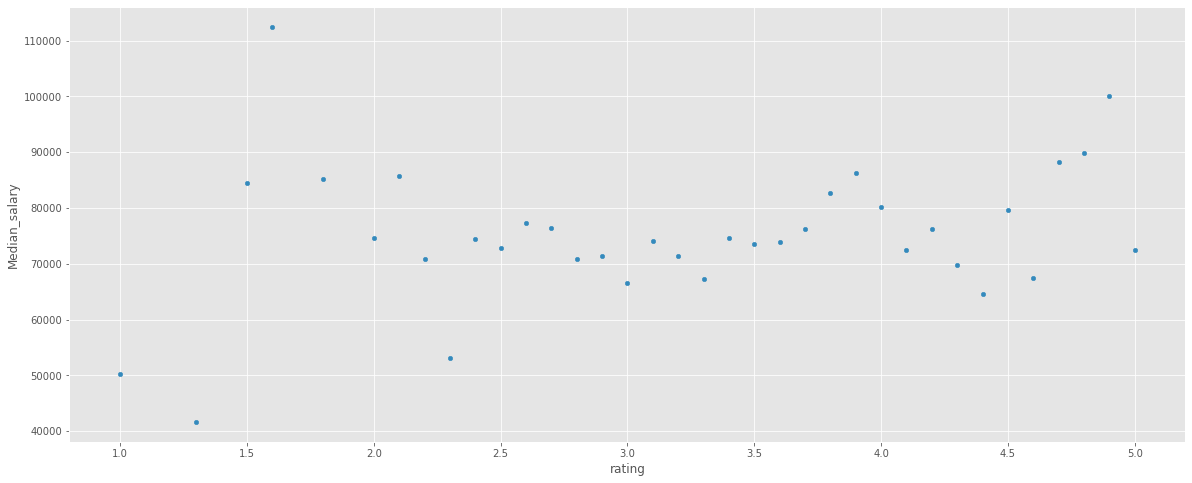

In [29]:
# use ggplot style

plt.style.use("ggplot")

chart = data.plot.scatter( x="rating", y="Median_salary" ,figsize=(20, 8))


In [30]:
# Get the correlation coefficient of the two variable

data.rating.corr(data.Median_salary)

0.23839759677600947

##### The correlation coefficient between the company rating  and the salary offered is 0.2384. This shows that there is a weak  correlation between the two.

Based on our analysis, we found that __there is no significant relationship between a company's rating and the salaries they offer to their employees__. Our results do not support the hypothesis that companies with higher ratings tend to offer higher salaries than those with lower ratings.



### 2. Jobs in larger cities tend to have higher salaries than those in smaller cities.


In [31]:
# Apply annual salary to our original dataframe

df = payment_adjuster(df)
cities = df.copy()

cities

,job_title,company_name,rating,company_location(city),company_location_state,salary_type,payment_cycle,Salary Range From,Salary range To,Median_salary,job_type,job_benefits,qualifications
0,"Senior Business Analyst, Contract Data",Stericycle,3.1,New Jersey,NJ,NaN,NaN,NaN,NaN,NaN,Full-time | Contract,"Prescription drug insurance, Dental insurance,...",Bachelor's degree
1,Digital Commerce Business Analyst,Sealed Air,3.5,Charlotte,NC,Estimated,Annually,65000.0,85000.0,75000.0,NaN,NaN,"Change management, Project management, Analysi..."
2,"Analyst, Sales Force Deploy-SR",Quest Diagnostics,3.6,Collegeville,PA,Estimated,Annually,91000.0,120000.0,105500.0,Full-time,NaN,"Microsoft Access, Laboratory experience, Micro..."
4,Business Analyst,Saama Technologies Inc,3.5,Bridgewater,NJ,Estimated,Annually,110000.0,140000.0,125000.0,NaN,NaN,"Analysis skills, Communication skills, Informa..."
5,Sr. Benefits System Analyst,The Archdiocese of Baltimore,3.7,Baltimore,MD,Estimated,Annually,68000.0,100000.0,84000.0,Full-time,"Health savings account, 403(b), Health insuran...","Microsoft Access, Analysis skills, Workday, Mi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,CB Data Science Associate/Sr. Associate - Cred...,"JPMorgan Chase Bank, N.A.",3.8,Plano,TX,NaN,NaN,NaN,NaN,NaN,Full-time,"Health insurance, Tuition reimbursement, Retir...","SQL, Tableau, Alteryx, Communication skills, R..."
5877,Fraud Recovery Analyst,"JPMorgan Chase Bank, N.A.",3.8,Indianapolis,IN,NaN,NaN,NaN,NaN,NaN,Full-time,"Health insurance, Tuition reimbursement, Retir...","Analysis skills, Microsoft Outlook, Fraud, Lea..."
5878,Actuarial Data Analyst,Lincoln Financial,3.5,Omaha,NE,Explicitly Defined,Annually,63100.0,137900.0,100500.0,NaN,"Health insurance, Employee assistance program,...","Analysis skills, SQL, SAS, Pricing, Communicat..."
5879,Business Analyst Associate I,"JPMorgan Chase Bank, N.A.",3.8,Fort Worth,TX,NaN,NaN,NaN,NaN,NaN,Full-time,"Health insurance, Tuition reimbursement, Retir...","Microsoft Access, Customer service, Microsoft ..."


In [32]:
# Drop all records whose payment cycles is Not Defined  
not_defined_cycle = cities[cities.payment_cycle == "Not Defined"].index
cities.drop(not_defined_cycle, inplace = True)
cities

,job_title,company_name,rating,company_location(city),company_location_state,salary_type,payment_cycle,Salary Range From,Salary range To,Median_salary,job_type,job_benefits,qualifications
0,"Senior Business Analyst, Contract Data",Stericycle,3.1,New Jersey,NJ,NaN,NaN,NaN,NaN,NaN,Full-time | Contract,"Prescription drug insurance, Dental insurance,...",Bachelor's degree
1,Digital Commerce Business Analyst,Sealed Air,3.5,Charlotte,NC,Estimated,Annually,65000.0,85000.0,75000.0,NaN,NaN,"Change management, Project management, Analysi..."
2,"Analyst, Sales Force Deploy-SR",Quest Diagnostics,3.6,Collegeville,PA,Estimated,Annually,91000.0,120000.0,105500.0,Full-time,NaN,"Microsoft Access, Laboratory experience, Micro..."
4,Business Analyst,Saama Technologies Inc,3.5,Bridgewater,NJ,Estimated,Annually,110000.0,140000.0,125000.0,NaN,NaN,"Analysis skills, Communication skills, Informa..."
5,Sr. Benefits System Analyst,The Archdiocese of Baltimore,3.7,Baltimore,MD,Estimated,Annually,68000.0,100000.0,84000.0,Full-time,"Health savings account, 403(b), Health insuran...","Microsoft Access, Analysis skills, Workday, Mi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,CB Data Science Associate/Sr. Associate - Cred...,"JPMorgan Chase Bank, N.A.",3.8,Plano,TX,NaN,NaN,NaN,NaN,NaN,Full-time,"Health insurance, Tuition reimbursement, Retir...","SQL, Tableau, Alteryx, Communication skills, R..."
5877,Fraud Recovery Analyst,"JPMorgan Chase Bank, N.A.",3.8,Indianapolis,IN,NaN,NaN,NaN,NaN,NaN,Full-time,"Health insurance, Tuition reimbursement, Retir...","Analysis skills, Microsoft Outlook, Fraud, Lea..."
5878,Actuarial Data Analyst,Lincoln Financial,3.5,Omaha,NE,Explicitly Defined,Annually,63100.0,137900.0,100500.0,NaN,"Health insurance, Employee assistance program,...","Analysis skills, SQL, SAS, Pricing, Communicat..."
5879,Business Analyst Associate I,"JPMorgan Chase Bank, N.A.",3.8,Fort Worth,TX,NaN,NaN,NaN,NaN,NaN,Full-time,"Health insurance, Tuition reimbursement, Retir...","Microsoft Access, Customer service, Microsoft ..."


Checking for data integrity in the columns we will work with (company_location(city) and Median_salary)

In [33]:
df["company_location(city)"].nunique()

1073

In [34]:
df["company_location(city)"].value_counts()

Remote             282
New York           127
Atlanta            103
Chicago             93
Washington          88
                  ... 
North Quincy         1
Longmont             1
Aberdeen             1
Mount Pleasant       1
King of Prussia      1
Name: company_location(city), Length: 1073, dtype: int64

In [35]:
cities = cities.loc[:,["company_location(city)", "Median_salary"]]
cities

,company_location(city),Median_salary
0,New Jersey,NaN
1,Charlotte,75000.0
2,Collegeville,105500.0
4,Bridgewater,125000.0
5,Baltimore,84000.0
...,...,...
5871,Plano,NaN
5877,Indianapolis,NaN
5878,Omaha,100500.0
5879,Fort Worth,NaN


In [36]:
cities.dropna(inplace = True)
cities

,company_location(city),Median_salary
1,Charlotte,75000.0
2,Collegeville,105500.0
4,Bridgewater,125000.0
5,Baltimore,84000.0
6,Chesapeake,57000.0
...,...,...
5856,Chicago,85500.0
5860,United States,96500.0
5861,Chandler,114000.0
5878,Omaha,100500.0


In [37]:
# Remove remote company location and jobs whose location is United States

not_remote = np.invert(cities["company_location(city)"].str.strip().str.startswith("Remote"))
not_US = np.invert(cities["company_location(city)"].str.strip().str.startswith("United"))

cities = cities[not_remote & not_US]

cities

,company_location(city),Median_salary
1,Charlotte,75000.0
2,Collegeville,105500.0
4,Bridgewater,125000.0
5,Baltimore,84000.0
6,Chesapeake,57000.0
...,...,...
5852,Arlington,97500.0
5853,New York,120000.0
5856,Chicago,85500.0
5861,Chandler,114000.0


I used [worldpopulationreview](https://worldpopulationreview.com/us-cities) data to get top 200 cities in the US by population. I also used citymayors(http://www.citymayors.com/statistics/richest-cities-2020.html) data to get top 23 US citiesby GDP

In [38]:
# Read json file with the 200 largest cities in the US by population.
large_cities_by_population = pd.read_json(r"large cities US.json")
large_cities_by_population

,pop2023,pop2022,pop2020,pop2010,growth,usps,geoid,ansicode,name,lsad,...,aland,awater,aland_sqmi,awater_sqmi,intptlat,intptlong,slug,metroId,rank,density
0,8992908,8930002,8804190,8175133,0.00704,NY,3651000,2395220,New York City,2,...,777983000,434642000,300.381,167.816,40.6635,-73.9387,new-york-city-ny,35620.0,1,29938
1,3930586,3919973,3898747,3792621,0.00271,CA,644000,2410877,Los Angeles,2,...,1214590000,87468500,468.956,33.772,34.0194,-118.4110,los-angeles-ca,31080.0,2,8382
2,2761625,2756546,2746388,2695598,0.00184,IL,1714000,428803,Chicago,2,...,588882000,17621500,227.369,6.804,41.8376,-87.6818,chicago-il,16980.0,3,12146
3,2366119,2345606,2304580,2099451,0.00875,TX,4835000,2410796,Houston,2,...,1658090000,81248100,640.194,31.370,29.7857,-95.3888,houston-tx,26420.0,4,3696
4,1656892,1640641,1608139,1445632,0.00991,AZ,455000,2411414,Phoenix,2,...,1340770000,3236740,517.673,1.250,33.5722,-112.0900,phoenix-az,38060.0,5,3201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,147556,147393,147067,145438,0.00111,CA,680000,2412087,Torrance,2,...,53150300,80323,20.521,0.031,33.8350,-118.3410,torrance-ca,NaN,196,7190
196,147389,147811,148655,152871,-0.00285,IL,1765000,2396405,Rockford,2,...,166740000,2628720,64.379,1.015,42.2593,-89.0635,rockford-il,40420.0,197,2289
197,146466,144772,141384,124442,0.01170,CA,682954,2412160,Visalia,2,...,98224000,51434,37.924,0.020,36.3280,-119.3290,visalia-ca,47300.0,198,3862
198,146155,145309,143617,135161,0.00582,CA,628000,2410556,Fullerton,2,...,58095900,32825,22.431,0.013,33.8857,-117.9280,fullerton-ca,NaN,199,6516


In [39]:
# Get only city names

large_cities_by_population = list(large_cities_by_population.name.values)
large_cities_by_population

['New York City',
 'Los Angeles',
 'Chicago',
 'Houston',
 'Phoenix',
 'Philadelphia',
 'San Antonio',
 'San Diego',
 'Dallas',
 'San Jose',
 'Austin',
 'Jacksonville',
 'Fort Worth',
 'Columbus',
 'Charlotte',
 'Indianapolis',
 'San Francisco',
 'Seattle',
 'Denver',
 'Nashville',
 'Washington',
 'Oklahoma City',
 'Boston',
 'El Paso',
 'Portland',
 'Las Vegas',
 'Memphis',
 'Detroit',
 'Baltimore',
 'Milwaukee',
 'Albuquerque',
 'Fresno',
 'Tucson',
 'Sacramento',
 'Mesa',
 'Kansas City',
 'Atlanta',
 'Omaha',
 'Colorado Springs',
 'Raleigh',
 'Long Beach',
 'Virginia Beach',
 'Oakland',
 'Miami',
 'Minneapolis',
 'Bakersfield',
 'Tulsa',
 'Aurora',
 'Arlington',
 'Wichita',
 'Tampa',
 'New Orleans',
 'Cleveland',
 'Honolulu',
 'Anaheim',
 'Irvine',
 'Henderson',
 'Lexington',
 'Stockton',
 'Orlando',
 'Louisville',
 'Newark',
 'Corpus Christi',
 'St. Paul',
 'Riverside',
 'Cincinnati',
 'Greensboro',
 'Santa Ana',
 'Jersey City',
 'San Juan',
 'Pittsburgh',
 'Lincoln',
 'Durham',
 '

In [40]:
x = pd.read_html("http://www.citymayors.com/statistics/richest-cities-2020.html")[2]

In [41]:
x.columns = x.loc[0].values
x.drop(0, inplace = True)
x

,Rank,City/Urban area,Country,Est GDP in 2020 in US$bn,Est annual growth 2005-2020
1,1,Tokyo,Japan,1602,2.0%
2,2,New York,USA,1561,2.2%
3,3,Los Angeles,USA,886,2.2%
4,4,London,UK,708,3.0%
5,5,Chicago,USA,645,2.3%
...,...,...,...,...,...
147,147,Addis Ababa,Ethiopia,18,6.2%
148,148,Kano,Nigeria,14,5.4%
149,149,Dar es Salaam,Tanzania,13,6.0%
150,150,Krakow,Poland,13,1.9%


In [42]:
# Get only city names in USA
large_cities_by_GDP = list(x[x["Country"] == "USA"]["City/Urban area"].values)
large_cities_by_GDP

['New York',
 'Los Angeles',
 'Chicago',
 'Philadelphia',
 'Washington DC',
 'Boston',
 'Dallas/Fort Worth',
 'Atlanta',
 'San Francisco/Oakland',
 'Houston',
 'Miami',
 'Detroit',
 'Seattle',
 'Phoenix',
 'Minneapolis',
 'San Diego',
 'Denver',
 'Baltimore',
 'St Louis',
 'Tampa/St Petersburg',
 'Cleveland',
 'Portland',
 'Pittsburgh']

In [43]:
large_cities = large_cities_by_GDP+large_cities_by_population
# remove duplicates

large_cities = list(set(large_cities))

In [44]:
df_cities = list(cities["company_location(city)"].values)

In [45]:
# Check if the company location is in a Large or Small citr.
larger_or_smaller = []

for city in df_cities:
    if city.strip() in large_cities:
        larger_or_smaller.append("Large")
    else:
        larger_or_smaller.append("Small")

In [46]:
cities.loc[:,"larger_or_smaller"] = larger_or_smaller
cities

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16076\1263727737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities.loc[:,"larger_or_smaller"] = larger_or_smaller


,company_location(city),Median_salary,larger_or_smaller
1,Charlotte,75000.0,Large
2,Collegeville,105500.0,Small
4,Bridgewater,125000.0,Small
5,Baltimore,84000.0,Large
6,Chesapeake,57000.0,Large
...,...,...,...
5852,Arlington,97500.0,Large
5853,New York,120000.0,Large
5856,Chicago,85500.0,Large
5861,Chandler,114000.0,Large
